Word length 2

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from numpy.linalg import inv

ell = 5
N = 2**ell-1
p = .9
q = 1 - p

A = np.zeros((N, N))

for i in range(0, N):
    for j in range(0, N):
        if i == 2 * j or i == 2 * (j - 2**(ell-1)):
            A[i][j] = .9
        if i == 2 * j + 1 or i == 2 * (j - 2**(ell-1)) + 1:
            A[i][j] = q
            
print(A)

eigen_values, eigen_vectors = linalg.eig(A)

'''
for i in range(0, N):
    print("Eigenvalue: {0}".format(eigen_values[i]))
    print("Eigenvector: {0}".format(eigen_vectors[i]))
'''
    
Id = np.identity(N)  
B = inv(Id - A)
print(B)

[[0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.1 0.  0.  0.  0.  0. 

In [ ]:
Cumulative Distribution

[0.729 0.081 0.081 0.009 0.081 0.009 0.009] 7 0.0010000000000000009


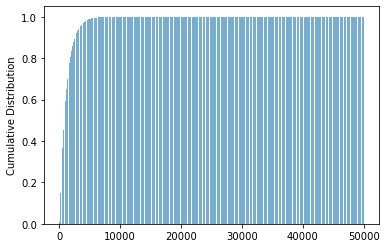

[0.    0.    0.001 ... 1.    0.    0.   ]


In [27]:
p0 = np.zeros((N))

for i in range(0, N):
    bin_repr = "{0:b}".format(i)
    k = bin_repr.count('1')
    p0[i] = (q**k) * (p**(ell-k))
       
print(p0, N, 1- np.sum(p0))

M = 50000

Distribution = np.zeros((M))
Distribution[ell-1] = 1 - np.sum(p0)
p_next = np.dot(A,p0)

for i in range(ell,M-ell+1):
    Distribution[i] = 1 - np.sum(p_next)
    p_next = np.dot(A, p_next)
  
y_pos = np.arange(M)
plt.bar(y_pos, Distribution, align='center', alpha=0.6)
plt.ylabel('Cumulative Distribution')
plt.show()

print(Distribution)

Distribution

[5.9049e-01 6.5610e-02 6.5610e-02 7.2900e-03 6.5610e-02 7.2900e-03
 7.2900e-03 8.1000e-04 6.5610e-02 7.2900e-03 7.2900e-03 8.1000e-04
 7.2900e-03 8.1000e-04 8.1000e-04 9.0000e-05 6.5610e-02 7.2900e-03
 7.2900e-03 8.1000e-04 7.2900e-03 8.1000e-04 8.1000e-04 9.0000e-05
 7.2900e-03 8.1000e-04 8.1000e-04 9.0000e-05 8.1000e-04 9.0000e-05
 9.0000e-05] 31 1.0000000000065512e-05


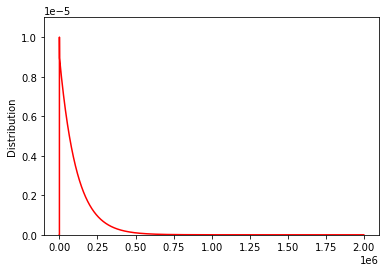

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.36962389e-13
 1.36961156e-13 1.36959923e-13] 0.999999984783927


In [43]:
p0 = np.zeros((N))

for i in range(0, N):
    bin_repr = "{0:b}".format(i)
    k = bin_repr.count('1')
    p0[i] = (q**k) * (p**(ell-k))
       
print(p0, N, 1- np.sum(p0))

M = 2000000
distribution = np.zeros((M))
distribution[ell-1] = 1 - np.sum(p0)

p_next = np.dot(Id-A,p0)

for i in range(ell,M):
    distribution[i] = np.sum(p_next)
    p_next = np.dot(A, p_next)
  
y_pos = np.arange(len(distribution))
plt.plot(distribution, color='red', label='Distribution')
plt.ylabel('Distribution')
plt.ylim((.0, 1.1 * np.max(distribution)))
plt.show()


print(distribution, np.sum(distribution))   

Mean

In [44]:
mean = 0

for i in range(0,M):
    mean += (i+1) * distribution[i]
    
print(mean)

111109.96787550696


1081.8262 0


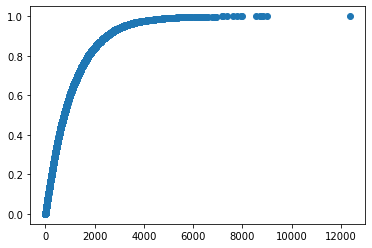

In [29]:
import random as rnd

def waiting_time(sequence):
    l = len(sequence)
    samples = []
    
    def _rand():
        if rnd.uniform(0, 1) <= p:
            return 0
        else:
            return 1
    
    for i in range(0, l):
        samples.append(_rand())
        
    counter = 0
    i = 2
        
    while counter < l:
        success = np.array([False for i in range(0, l)])
                
        for k in range(0, l): 
            if samples[len(samples) - k - 1] == 1:
                success[k] = True
          
        if np.sum(success) == l:
            return i
        else:
            i += 1
            samples.append(_rand())
            

nb_samples = 10000           
samples = np.array([waiting_time([1, 1, 1]) for i in range(0,nb_samples)])

mean_emp = np.mean(samples)

print(mean_emp, mean)


def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
 
x,y = ecdf(samples)
plt.scatter(x=x, y=y)
plt.show()
    